                                            ## WEEK 4: FRIDAY LAB 03
 

1. Be sure that your code works and is clearly written and commented. (5 points) 
2. Then, answer the following questions ABOUT YOUR CODE (not as a general definition) in either comments or markdown:
      1. How did you decide which attributes to pick for your analysis? (1 point)
      2. What connections between the attributes do the results of your analysis reveal?  Were there any surprises? (2points)
      3. Would you be able to predict future values of one attribute from a correlation with one or two others? Research how you could do this in your chosen language and try it out. (2 points)

In [54]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import math
from math import acos, degrees
from scipy import spatial
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn.metrics.pairwise import cosine_similarity

#Reading in the IPL dataframe
Match = pd.read_csv('Indian Premium Leaque\Match.csv')

#Verifying that we can see the data
Match

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,22-May-16,6,2,9,Shaheed Veer Narayan Singh International Stadium,2,field,0,1,0,by wickets,6.0,2.0,8.0,511,497,Raipur,India
573,981018,24-May-16,13,2,9,M Chinnaswamy Stadium,2,field,0,1,0,by wickets,4.0,2.0,110.0,495,482,Bangalore,India
574,981020,25-May-16,11,1,9,Feroz Shah Kotla,1,field,0,1,0,by runs,22.0,11.0,163.0,481,499,Delhi,India
575,981022,27-May-16,13,11,9,Feroz Shah Kotla,11,field,0,1,0,by wickets,4.0,11.0,187.0,481,498,Delhi,India


In [55]:
Match.dtypes

Match_Id                 int64
Match_Date              object
Team_Name_Id             int64
Opponent_Team_Id         int64
Season_Id                int64
Venue_Name              object
Toss_Winner_Id           int64
Toss_Decision           object
IS_Superover             int64
IS_Result                int64
Is_DuckWorthLewis        int64
Win_Type                object
Won_By                 float64
Match_Winner_Id        float64
Man_Of_The_Match_Id    float64
First_Umpire_Id          int64
Second_Umpire_Id         int64
City_Name               object
Host_Country            object
dtype: object

The chosen attributes are Win_Type, Won_by, and Is_DuckWorthLewis

Cosine Similarity

In [67]:
# Remove rows with NA from chosen data types in numeric attributes to perform Cosine Similarity, Covariance, and Correlation
Match = Match[Match['Won_By'].notna()]
Match = Match[Match['Is_DuckWorthLewis'].notna()]
Match

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Season_Id,Venue_Name,Toss_Winner_Id,Toss_Decision,IS_Superover,IS_Result,Is_DuckWorthLewis,Win_Type,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Host_Country
0,335987,18-Apr-08,2,1,1,M Chinnaswamy Stadium,2,field,0,1,0,by runs,140.0,1.0,2.0,470,477,Bangalore,India
1,335988,19-Apr-08,4,3,1,"Punjab Cricket Association Stadium, Mohali",3,bat,0,1,0,by runs,33.0,3.0,19.0,471,487,Chandigarh,India
2,335989,19-Apr-08,6,5,1,Feroz Shah Kotla,5,bat,0,1,0,by wickets,9.0,6.0,90.0,472,512,Delhi,India
3,335990,20-Apr-08,7,2,1,Wankhede Stadium,7,bat,0,1,0,by wickets,5.0,2.0,11.0,473,476,Mumbai,India
4,335991,20-Apr-08,1,8,1,Eden Gardens,8,bat,0,1,0,by wickets,5.0,1.0,4.0,474,486,Kolkata,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,981016,22-May-16,6,2,9,Shaheed Veer Narayan Singh International Stadium,2,field,0,1,0,by wickets,6.0,2.0,8.0,511,497,Raipur,India
573,981018,24-May-16,13,2,9,M Chinnaswamy Stadium,2,field,0,1,0,by wickets,4.0,2.0,110.0,495,482,Bangalore,India
574,981020,25-May-16,11,1,9,Feroz Shah Kotla,1,field,0,1,0,by runs,22.0,11.0,163.0,481,499,Delhi,India
575,981022,27-May-16,13,11,9,Feroz Shah Kotla,11,field,0,1,0,by wickets,4.0,11.0,187.0,481,498,Delhi,India


In [68]:
#cosine Similarity
# Here is a solution that uses the spatial package from scipy

a = np.array(Match.Won_By)
b = np.array(Match.Is_DuckWorthLewis)

result = 1 - spatial.distance.cosine(a, b)

# Now we need to convert the angle to radians to get the degrees
angle_in_radians = math.acos(result)
degrees = math.degrees(angle_in_radians)

print(result, degrees)

0.09153776553989801 84.7479202082026


In [69]:
##**Covariance**

np.cov([Match.Won_By], [Match.Is_DuckWorthLewis], bias = True)[0][1]

-0.04270296072207894

In [70]:
# change datatype as category to perform chi square to determine the various associations
Match['Win_Type'] = Match['Win_Type'].astype("category")


Match.dtypes[['Win_Type']]

Win_Type    category
dtype: object

Chi Square

In [71]:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(Match.Win_Type, Match.Won_By).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 404.7742025842649 ,p-value: 1.5241307232843268e-44, Degrees of Freedom: 81


In [63]:
chi2, p, dof, expected = chi2_contingency((pd.crosstab(Match.Win_Type, Match.Is_DuckWorthLewis).values))
print (f'Chi-square Statistic: {chi2} ,p-value: {p}, Degrees of Freedom: {dof}')

Chi-square Statistic: 0.7123519502000943 ,p-value: 0.3986641254355271, Degrees of Freedom: 1


Correlation

In [72]:
corr = Match.corr()
corr

,Match_Id,Team_Name_Id,Opponent_Team_Id,Season_Id,Toss_Winner_Id,IS_Superover,IS_Result,Is_DuckWorthLewis,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id
Match_Id,1.000000,0.203838,0.146327,0.973133,0.156129,NaN,NaN,0.045024,-0.027350,0.184646,0.347164,0.636402,0.240211
Team_Name_Id,0.203838,1.000000,-0.069499,0.192271,0.402565,NaN,NaN,0.032799,-0.081700,0.497907,0.110674,0.109050,0.043026
Opponent_Team_Id,0.146327,-0.069499,1.000000,0.134070,0.523110,NaN,NaN,-0.025934,0.027771,0.421478,0.080067,0.068174,0.031826
Season_Id,0.973133,0.192271,0.134070,1.000000,0.134985,NaN,NaN,0.016492,-0.016961,0.161633,0.363282,0.610330,0.246583
Toss_Winner_Id,0.156129,0.402565,0.523110,0.134985,1.000000,NaN,NaN,0.056796,0.017411,0.437326,0.101000,0.093204,0.079917
IS_Superover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IS_Result,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Is_DuckWorthLewis,0.045024,0.032799,-0.025934,0.016492,0.056796,NaN,NaN,1.000000,-0.012167,0.018850,-0.066334,0.080018,0.049092
Won_By,-0.027350,-0.081700,0.027771,-0.016961,0.017411,NaN,NaN,-0.012167,1.000000,-0.080679,-0.075842,-0.005873,0.017980
Match_Winner_Id,0.184646,0.497907,0.421478,0.161633,0.437326,NaN,NaN,0.018850,-0.080679,1.000000,0.188122,0.066555,0.054988


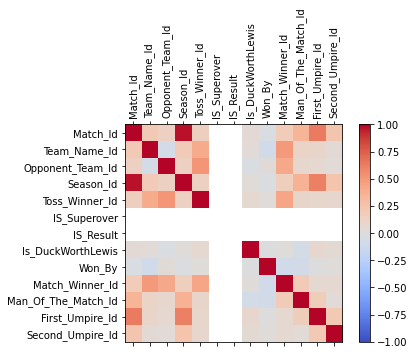

In [73]:
#correlation heatmap
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(corr.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)
plt.show()

In [66]:
# correlation between the Is_DuckWorthLewis and Won_By
Match['Is_DuckWorthLewis'].corr(Match['Won_By'])

-0.012166719286602009

A.How did you decide which attributes to pick for your analysis? (1 point)


I choose Win_Type, Won_by, and Is_DuckWorthLewis by selecting a 1 category type data and two numeric data types in order to satisfy the needs to perfom all the measures of association. Win type seemed to have a close association winning amount Won by and DuckWorthLewis refers number of runs needed to win on bad weather days

B. What connections between the attributes do the results of your analysis reveal? Were there any surprises? (2points)


In correlation Is_DuckWorthLewis and Won_By it showed that Is_DuckWorthLewis and Won_By are negatively correlated. It was suprising when the Chi Square analysis revealed that Win_type and Won_by were not depended on each other

C. Would you be able to predict future values of one attribute from a correlation with one or two others? Research how you could do this in your chosen language and try it out. (2 points)


Yes you could predict the future with correlation as if the correlation is between -1 and 0 they expect when one value grows the other will fail and if between 0 and +1 then expect as the other attribute grows the other grows too.

In [78]:
# Example of future prediction with correlation

Match['Won_By'].corr(Match['Season_Id'])

-0.016961318202334492

Particular seasons have high winning amount  with  low id because as the score increases the season id drops 